## Procesamiento de datos

In [1]:
import pandas as pd

# Crear una lista para almacenar los DataFrames
dataframes = []

# Adquirir los archivos CSV y almacenarlos en la lista
for i in range(1, 31):
    file_name = f'DATOSCLIENTE{i}.csv'
    df = pd.read_csv(file_name)
    df['NumeroCliente'] = str("Cliente "+str(i))
    dataframes.append(df)

In [2]:
# Extraer Mes,Día y Hora
combined_df = pd.concat(dataframes)
combined_df['Mes'] = pd.to_datetime(combined_df['Fecha']).dt.month
combined_df['Día'] = pd.to_datetime(combined_df['Fecha']).dt.day
combined_df['Hora'] = pd.to_datetime(combined_df['Fecha']).dt.hour


In [3]:
# Adquirir el archivo del sector económico 
archivo_excel = 'sector_economico_clientes.xlsx'
dataframe = pd.read_excel(archivo_excel)
dataframe = dataframe.rename(columns={'Cliente:': 'NumeroCliente'})
dataframe['NumeroCliente'] = dataframe['NumeroCliente'].str.strip()

### Planteamiento de regla para definir anomalías

Según lo investigado por el equipo de trabajo en temas de generación y consumo de energía, se encontró que la presencia de energía activa negativa es considerada como un comportamiento no usual ya que la energía activa es la que consumen los equipos, por lo que su valor negativo es considerado como anomalía. También, una amplia diferencia entre la energía activa ya la reactiva (la que generan los equipos por su funcionamiento) puede indicar un mal funcionamiento, por lo que una diferencia del 10% entre estas también se considera anomalía.

In [4]:
# Realizar la unión (join) basado en la columna "NumeroCliente"
combined_df = combined_df.merge(dataframe[['NumeroCliente', 'Sector Económico:']], on='NumeroCliente', how='left')
combined_df['Anomalía'] = combined_df.apply(lambda row: 'Si' if row['Active_energy'] != 0 and (((row['Active_energy'] - row['Reactive_energy']) / row['Active_energy']) < -0.9 or row['Active_energy'] < 0) else 'No', axis=1)

## Gráficas exploratorias

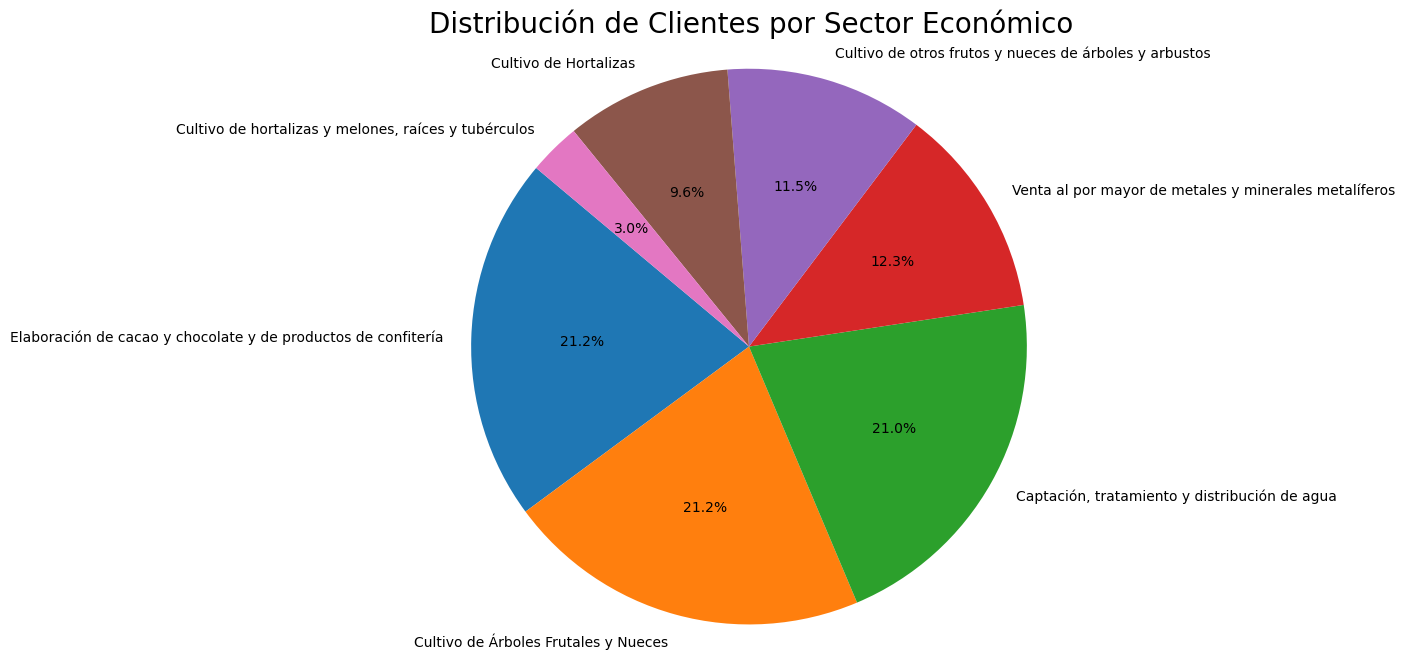

In [5]:
import matplotlib.pyplot as plt

# Contar el número de clientes en cada sector económico
sector_counts = combined_df['Sector Económico:'].value_counts()

# Crear una gráfica de torta
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)

# Aumentar el tamaño de la fuente
plt.title('Distribución de Clientes por Sector Económico', fontsize=20)
plt.axis('equal')  # Hace que la gráfica de torta sea un círculo en lugar de una elipse

# Mostrar la gráfica
plt.show()


<Figure size 1500x800 with 0 Axes>

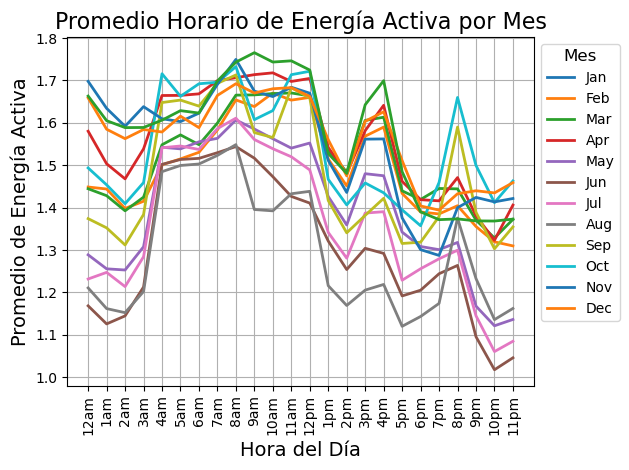

In [6]:
import calendar

# Agrupar por mes y hora y calcular el promedio de 'Active_energy'
monthly_hourly_avg = combined_df.groupby(['Hora', 'Mes'])['Active_energy'].mean().unstack()

# Reordenar las columnas según el orden de las horas
order = list(range(24))  # Orden de 0 a 23 horas
monthly_hourly_avg = monthly_hourly_avg.reindex(columns=order)

# Configurar el tamaño de la figura antes de crear el gráfico
plt.figure(figsize=(15, 8))  # Tamaño más grande, ajusta el ancho y alto según lo necesario

# Crear el gráfico con el orden correcto de las horas y el formato de 12 horas en el eje x
monthly_hourly_avg.plot(legend='reverse', lw=2)

# Configurar etiquetas y título
plt.xlabel('Hora del Día', fontsize=14)
plt.ylabel('Promedio de Energía Activa', fontsize=14)
plt.title('Promedio Horario de Energía Activa por Mes', fontsize=16)

# Establecer etiquetas personalizadas en el eje x con el formato de 12 horas
horas = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am',
         '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
index_horas = list(range(24))
plt.xticks(index_horas, horas, rotation='vertical')  # Rotar etiquetas verticalmente

# Obtener nombres de los meses para la leyenda
nombres_meses = [calendar.month_abbr[i] for i in range(1, 13)]  # Obtener nombres de los meses en inglés abreviados

# Mostrar la leyenda fuera del gráfico con los nombres de los meses
plt.legend(nombres_meses, title='Mes', title_fontsize='12', fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()




<Figure size 1500x800 with 0 Axes>

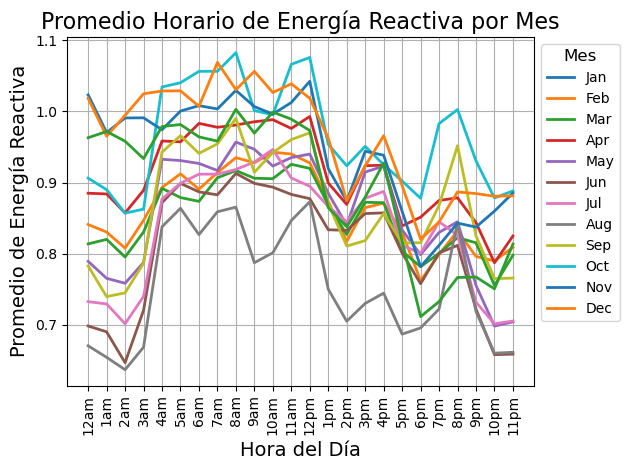

In [7]:
# Agrupar por mes y hora y calcular el promedio de 'Active_energy'
monthly_hourly_avg = combined_df.groupby(['Hora', 'Mes'])['Reactive_energy'].mean().unstack()

# Reordenar las columnas según el orden de las horas
order = list(range(24))  # Orden de 0 a 23 horas
monthly_hourly_avg = monthly_hourly_avg.reindex(columns=order)

# Configurar el tamaño de la figura antes de crear el gráfico
plt.figure(figsize=(15, 8))  # Tamaño más grande, ajusta el ancho y alto según lo necesario

# Crear el gráfico con el orden correcto de las horas y el formato de 12 horas en el eje x
monthly_hourly_avg.plot(legend='reverse', lw=2)

# Configurar etiquetas y título
plt.xlabel('Hora del Día', fontsize=14)
plt.ylabel('Promedio de Energía Reactiva', fontsize=14)
plt.title('Promedio Horario de Energía Reactiva por Mes', fontsize=16)

# Establecer etiquetas personalizadas en el eje x con el formato de 12 horas
horas = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am',
         '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
index_horas = list(range(24))
plt.xticks(index_horas, horas, rotation='vertical')  # Rotar etiquetas verticalmente

# Obtener nombres de los meses para la leyenda
nombres_meses = [calendar.month_abbr[i] for i in range(1, 13)]  # Obtener nombres de los meses en inglés abreviados

# Mostrar la leyenda fuera del gráfico con los nombres de los meses
plt.legend(nombres_meses, title='Mes', title_fontsize='12', fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


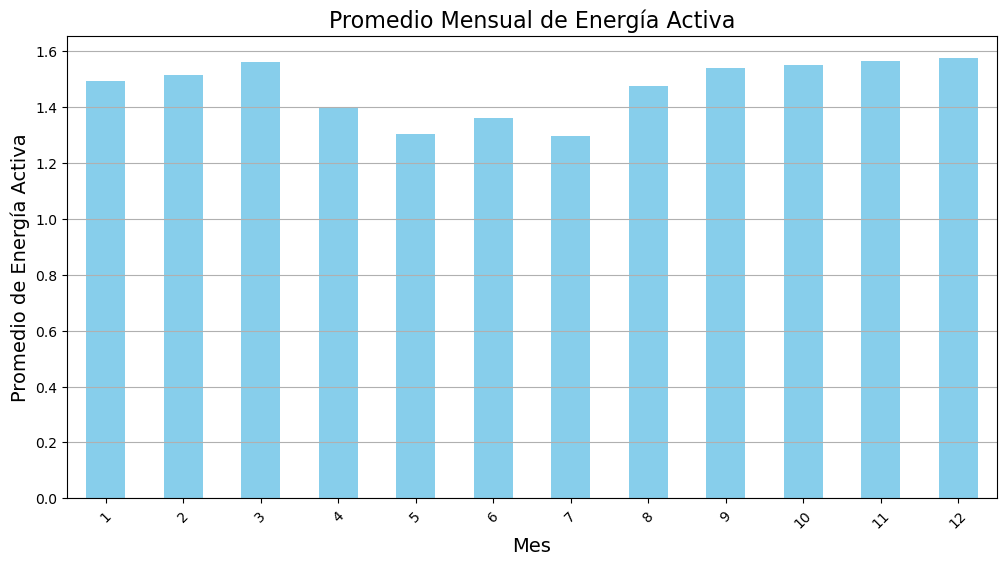

In [8]:
# Calcular el promedio mensual de 'Active_energy'
monthly_avg = combined_df.groupby('Mes')['Active_energy'].mean()

# Crear el gráfico de barras
monthly_avg.plot(kind='bar', figsize=(12, 6), color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Promedio de Energía Activa', fontsize=14)
plt.title('Promedio Mensual de Energía Activa', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()


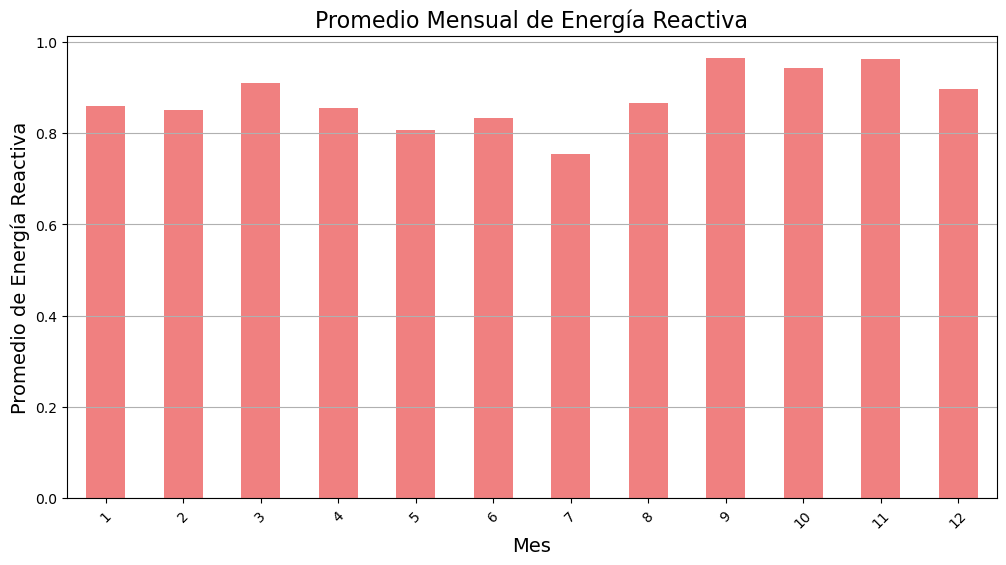

In [9]:
# Calcular el promedio mensual de 'Reactive_energy'
monthly_avg = combined_df.groupby('Mes')['Reactive_energy'].mean()

# Crear el gráfico de barras
monthly_avg.plot(kind='bar', figsize=(12, 6), color='lightcoral')

# Configurar etiquetas y título
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Promedio de Energía Reactiva', fontsize=14)
plt.title('Promedio Mensual de Energía Reactiva', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()


In [10]:
# Seleccionar las columnas que no se incluirán en el cálculo de la matriz de correlación
columnas_excluir = ['Mes', 'Día', 'Hora']

# Crear una copia del DataFrame sin las columnas a excluir
columns_to_correlate = combined_df.drop(columns=columnas_excluir)

# Calcular la matriz de correlación
correlation_matrix = columns_to_correlate.corr()
correlation_matrix

,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC
Active_energy,1.000000,0.641789,-0.240723,-0.239892
Reactive_energy,0.641789,1.000000,-0.150958,-0.158293
Voltaje_FA,-0.240723,-0.150958,1.000000,0.954814
Voltaje_FC,-0.239892,-0.158293,0.954814,1.000000


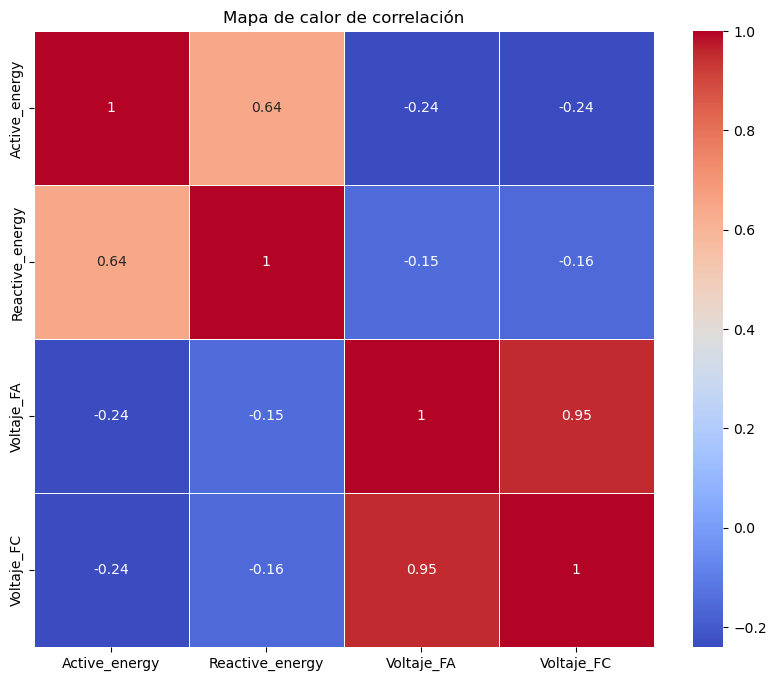

In [11]:
import seaborn as sns

# Seleccionar las columnas que no se incluirán en el cálculo de la matriz de correlación
columnas_excluir = ['Mes', 'Día', 'Hora']

# Crear una copia del DataFrame sin las columnas a excluir
columns_to_correlate = combined_df.drop(columns=columnas_excluir)

# Calcular la matriz de correlación
correlation_matrix = columns_to_correlate.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de calor de correlación')
plt.show()



## Inicio del modelamiento

In [12]:
# Seleccionar las columnas específicas que deseas
X = combined_df[["Active_energy", "Reactive_energy", "Voltaje_FA", "Voltaje_FC"]]

# Dummies sector económico
dummies = pd.get_dummies(combined_df["Sector Económico:"], prefix="Sector",drop_first=True)
# Concatenar los dummies al DataFrame original
X = pd.concat([X, dummies], axis=1)

In [14]:
y=combined_df[["Anomalía"]]

## Kmeans

El algoritmo K-means es una técnica de agrupamiento que busca dividir un conjunto de datos en un número predefinido de grupos (o clusters), donde cada punto de datos es asignado al cluster más cercano al centroide. 

In [15]:
from sklearn.cluster import KMeans
import numpy as np
# Establecer una semilla para que el clustering sea reproducible
np.random.seed(42)

# Aplicar K-means al DataFrame X
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)  
kmeans.fit(X)

# Obtener las etiquetas de los clusters asignados a cada fila
etiquetas_clusters = kmeans.labels_

# Agregar las etiquetas de los clusters al DataFrame X
X['Cluster'] = etiquetas_clusters
combined_df['Cluster'] = etiquetas_clusters

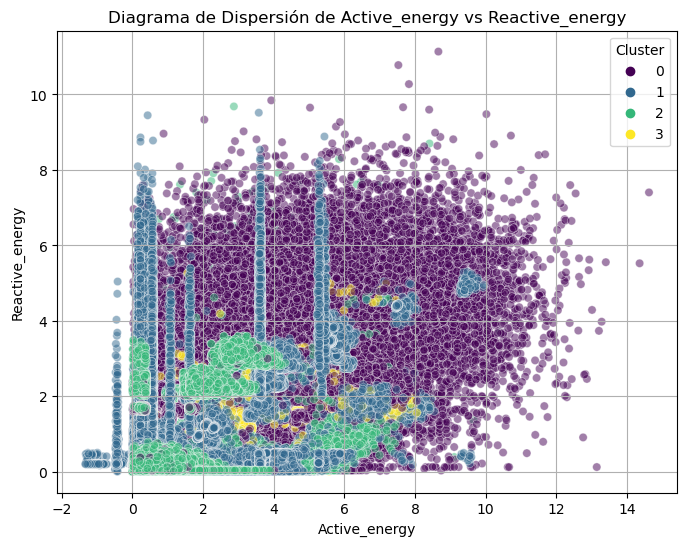

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='Active_energy', y='Reactive_energy', alpha=0.5, hue='Cluster', palette='viridis')
plt.title('Diagrama de Dispersión de Active_energy vs Reactive_energy')
plt.xlabel('Active_energy')
plt.ylabel('Reactive_energy')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

In [21]:
pd.set_option('display.max_rows', None)
# Suponiendo que 'combined_df' es el DataFrame que contiene tus datos

# Filtrar los datos donde 'Anomalía' es igual a 'Si'
anomalias_si = combined_df[combined_df['Anomalía'] == 'Si']

# Contar las anomalías por cluster
anomalias_por_cluster = anomalias_si.groupby('Cluster').agg({'Anomalía': 'count'}).reset_index()
anomalias_por_cluster.rename(columns={'Anomalía': 'Anomalía_Si'}, inplace=True)

# Contar las no anomalías por cluster
no_anomalias = combined_df[combined_df['Anomalía'] == 'No']
no_anomalias_por_cluster = no_anomalias.groupby('Cluster').size().reset_index(name='Anomalía_No')

# Calcular la suma total por cluster
suma_total_por_cluster = anomalias_por_cluster.merge(no_anomalias_por_cluster, on='Cluster', how='outer')
suma_total_por_cluster['Total'] = suma_total_por_cluster['Anomalía_Si'] + suma_total_por_cluster['Anomalía_No']
suma_total_por_cluster['Porcentaje_Si'] = (suma_total_por_cluster['Anomalía_Si'] / suma_total_por_cluster['Total']) * 100
suma_total_por_cluster['Porcentaje_No'] = (suma_total_por_cluster['Anomalía_No'] / suma_total_por_cluster['Total']) * 100
suma_total_por_cluster.fillna(0, inplace=True)
suma_total_por_cluster.sort_values(by='Porcentaje_Si',ascending=False)

,Cluster,Anomalía_Si,Anomalía_No,Total,Porcentaje_Si,Porcentaje_No
1,1,39441,182122,221563,17.801257,82.198743
2,2,3915,89560,93475,4.188286,95.811714
0,0,5485,129168,134653,4.073433,95.926567
3,3,456,13278,13734,3.320227,96.679773


Dentro del agrupamiento obtenido, evidenciamos que el 17% de las anomalías se agrupan en el cluster 1, lo cual es atractivo ya que los porcentaje de detección de fraude están al rededor del 20% para esta problemática debido a su complejidad.

El coeficiente de silueta obtenido es 0.6, lo que indica que los cluster tienen un agrupamiento aceptable

In [16]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silueta
coeficiente_silueta = silhouette_score(X, etiquetas_clusters)

# Mostrar el coeficiente de silueta
print("Coeficiente de Silueta:", coeficiente_silueta)


Coeficiente de Silueta: 0.6027635894435924


La mayoría de las anomalías son atribuidas al cliente 20 y muy por debajo el cliente 15, por lo que deberían ser foco de estudio.

In [28]:
#Análisis de anomalías por cliente clúster 1
combined_df[(combined_df['Anomalía'] == 'Si') & (combined_df['Cluster'] == 1)].groupby('NumeroCliente').size()

NumeroCliente
Cliente 10        1
Cliente 11       93
Cliente 13     1912
Cliente 14     3673
Cliente 15     4134
Cliente 16     1658
Cliente 17     1529
Cliente 18     2396
Cliente 19       42
Cliente 20    12057
Cliente 21     2921
Cliente 22     2073
Cliente 23     1866
Cliente 24     1969
Cliente 25     2176
Cliente 6       109
Cliente 7         6
Cliente 8        16
Cliente 9       810
dtype: int64

La cantidad de anomalías se parece distribuir de forma uniforme, salvo en las horas de la noche donde parece haber una tendencia creciente

In [29]:
#Análisis de anomalías por hora clúster 1
combined_df[(combined_df['Anomalía'] == 'Si') & (combined_df['Cluster'] == 1)].groupby('Hora').size()

Hora
0     1689
1     1679
2     1677
3     1588
4     1387
5     1440
6     1386
7     1402
8     1412
9     1436
10    1479
11    1354
12    1263
13    1461
14    1684
15    1679
16    1691
17    1979
18    2084
19    2067
20    1806
21    1900
22    2003
23    1895
dtype: int64

El sector económico con mayor cantidad de anomalías registradas es el de Captación, tratamiento y distribución de agua.

In [30]:
#Análisis de anomalías por sector clúster 1
combined_df[(combined_df['Anomalía'] == 'Si') & (combined_df['Cluster'] == 1)].groupby('Sector Económico:').size()

Sector Económico:
Captación, tratamiento y distribución de agua             17682
Cultivo de Hortalizas                                     11005
Cultivo de hortalizas y melones, raíces y tubérculos       1912
Cultivo de otros frutos y nueces de árboles y arbustos     7900
Cultivo de Árboles Frutales y Nueces                        942
dtype: int64

Se desarrolla un tablero con ipywidgets interactivo para segmentar los clusters obtenidos por los diferentes sectores y clientes

In [22]:
#Gráfica con ipywidgets
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

# Obtener valores únicos para las columnas NumeroCliente, Sector Económico: y Anomalía
clientes_unicos = ['Todos'] + list(combined_df['NumeroCliente'].unique())
sectores_unicos = ['Todos'] + list(combined_df['Sector Económico:'].unique())
anomalias_unicas = ['Todos'] + list(combined_df['Anomalía'].unique())

# Crear widgets para seleccionar el NumeroCliente, el Sector Económico y la Anomalía
cliente_widget = widgets.Dropdown(options=clientes_unicos, description='NumeroCliente:')
sector_widget = widgets.Dropdown(options=sectores_unicos, description='Sector Económico:')
anomalia_widget = widgets.Dropdown(options=anomalias_unicas, description='Anomalía:')

# Definir función para actualizar opciones de sectores económicos al seleccionar un cliente
def update_sectores_options(cliente_seleccionado):
    if cliente_seleccionado == 'Todos':
        sectores_disponibles = combined_df['Sector Económico:'].unique()
    else:
        sectores_disponibles = combined_df[combined_df['NumeroCliente'] == cliente_seleccionado]['Sector Económico:'].unique()
    sector_widget.options = ['Todos'] + list(sectores_disponibles)

# Definir función para actualizar opciones de clientes al seleccionar un sector económico
def update_clientes_options(sector_seleccionado):
    if sector_seleccionado == 'Todos':
        clientes_disponibles = combined_df['NumeroCliente'].unique()
    else:
        clientes_disponibles = combined_df[combined_df['Sector Económico:'] == sector_seleccionado]['NumeroCliente'].unique()
    cliente_widget.options = ['Todos'] + list(clientes_disponibles)

# Crear función para actualizar la gráfica según los filtros seleccionados
def update_plot(NumeroCliente, Sector_Economico, Anomalia):
    plt.figure(figsize=(8, 6))
    if NumeroCliente == 'Todos':
        clientes_seleccionados = combined_df['NumeroCliente'].unique()
    else:
        clientes_seleccionados = [NumeroCliente]
    if Sector_Economico == 'Todos':
        sectores_seleccionados = combined_df['Sector Económico:'].unique()
    else:
        sectores_seleccionados = [Sector_Economico]
    if Anomalia == 'Todos':
        anomalias_seleccionadas = combined_df['Anomalía'].unique()
    else:
        anomalias_seleccionadas = [Anomalia]
    sns.scatterplot(data=combined_df[(combined_df['NumeroCliente'].isin(clientes_seleccionados)) & 
                                      (combined_df['Sector Económico:'].isin(sectores_seleccionados)) &
                                      (combined_df['Anomalía'].isin(anomalias_seleccionadas))],
                    x='Active_energy', y='Reactive_energy', alpha=0.5, hue='Cluster', palette='viridis')
    plt.title('Diagrama de Dispersión de Active_energy vs Reactive_energy')
    plt.xlabel('Active_energy')
    plt.ylabel('Reactive_energy')
    plt.grid(True)
    plt.legend(title='Cluster')
    plt.show()

# Conectar la función update_sectores_options al evento de cambio de valor del widget de cliente
cliente_widget.observe(lambda cambio: update_sectores_options(cambio.new), names='value')

# Conectar la función update_clientes_options al evento de cambio de valor del widget de sector
sector_widget.observe(lambda cambio: update_clientes_options(cambio.new), names='value')

# Crear la interfaz interactiva
widgets.interactive(update_plot, NumeroCliente=cliente_widget, Sector_Economico=sector_widget, Anomalia=anomalia_widget)



interactive(children=(Dropdown(description='NumeroCliente:', options=('Todos', 'Cliente 1', 'Cliente 2', 'Clie…

## DBSCAN

La gran ventaja del uso de DBSCAN en la detección de anomalías en datos eléctricos basados en energía activa y reactiva es su capacidad para identificar grupos de densidades variables y detectar puntos atípicos como ruido o anomalías en los datos.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering que no requiere la especificación del número de clusters de antemano, lo que lo hace especialmente útil cuando la estructura de los datos no es conocida de antemano o puede variar.

In [79]:
from sklearn.cluster import DBSCAN

# Establecer una semilla para que el clustering sea reproducible
np.random.seed(42)

# Aplicar DBSCAN al DataFrame X
dbscan = DBSCAN(eps=2, min_samples=20)  # Ajusta los parámetros según tu necesidad
dbscan.fit(X)

# Obtener las etiquetas de los clusters asignados a cada fila
etiquetas_clusters_dbscan = dbscan.labels_

# Agregar las etiquetas de los clusters al DataFrame X
X['Cluster_DBSCAN'] = etiquetas_clusters_dbscan
combined_df['Cluster_DBSCAN'] = etiquetas_clusters_dbscan

# Mostrar el DataFrame con las etiquetas de los clusters asignados por DBSCAN
combined_df.head()

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,NumeroCliente,Mes,Día,Hora,Sector Económico:,Anomalía,Cluster,Cluster_DBSCAN
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,Cliente 1,1,1,0,Elaboración de cacao y chocolate y de producto...,No,4,0
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,Cliente 1,1,1,1,Elaboración de cacao y chocolate y de producto...,No,4,0
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,Cliente 1,1,1,2,Elaboración de cacao y chocolate y de producto...,No,4,0
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,Cliente 1,1,1,3,Elaboración de cacao y chocolate y de producto...,No,4,0
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,Cliente 1,1,1,4,Elaboración de cacao y chocolate y de producto...,No,4,0


C:\Users\johnn\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


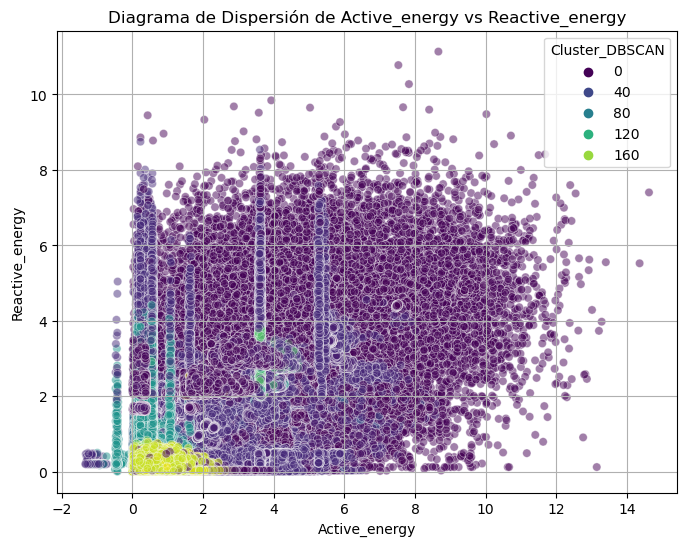

In [80]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='Active_energy', y='Reactive_energy', alpha=0.5, hue='Cluster_DBSCAN', palette='viridis')
plt.title('Diagrama de Dispersión de Active_energy vs Reactive_energy')
plt.xlabel('Active_energy')
plt.ylabel('Reactive_energy')
plt.grid(True)
plt.legend(title='Cluster_DBSCAN')
plt.show()

Debido a la naturaleza del algoritmo, se obtuvo una gran cantidad de Clústers, por lo que se decidió no implementar el algoritmo a pesar de lograr porcentajes mejores a KMeans, la implementación de muchos clústers puede ser contraproducente.

In [81]:
import pandas as pd
pd.set_option('display.max_rows', None)
# Suponiendo que 'combined_df' es el DataFrame que contiene tus datos

# Filtrar los datos donde 'Anomalía' es igual a 'Si'
anomalias_si = combined_df[combined_df['Anomalía'] == 'Si']

# Contar las anomalías por cluster
anomalias_por_cluster = anomalias_si.groupby('Cluster_DBSCAN').agg({'Anomalía': 'count'}).reset_index()
anomalias_por_cluster.rename(columns={'Anomalía': 'Anomalía_Si'}, inplace=True)

# Contar las no anomalías por cluster
no_anomalias = combined_df[combined_df['Anomalía'] == 'No']
no_anomalias_por_cluster = no_anomalias.groupby('Cluster_DBSCAN').size().reset_index(name='Anomalía_No')

# Calcular la suma total por cluster
suma_total_por_cluster = anomalias_por_cluster.merge(no_anomalias_por_cluster, on='Cluster_DBSCAN', how='outer')
suma_total_por_cluster['Total'] = suma_total_por_cluster['Anomalía_Si'] + suma_total_por_cluster['Anomalía_No']
suma_total_por_cluster['Porcentaje_Si'] = (suma_total_por_cluster['Anomalía_Si'] / suma_total_por_cluster['Total']) * 100
suma_total_por_cluster['Porcentaje_No'] = (suma_total_por_cluster['Anomalía_No'] / suma_total_por_cluster['Total']) * 100
suma_total_por_cluster.fillna(0, inplace=True)
print(suma_total_por_cluster.shape[0])
suma_total_por_cluster.sort_values(by='Porcentaje_Si',ascending=False)


191


,Cluster_DBSCAN,Anomalía_Si,Anomalía_No,Total,Porcentaje_Si,Porcentaje_No
92,164,29.0,55.0,84.0,34.523810,65.476190
69,95,13.0,26.0,39.0,33.333333,66.666667
66,92,198.0,423.0,621.0,31.884058,68.115942
16,24,969.0,2144.0,3113.0,31.127530,68.872470
82,154,48.0,110.0,158.0,30.379747,69.620253
71,97,9138.0,21203.0,30341.0,30.117663,69.882337
97,169,31.0,73.0,104.0,29.807692,70.192308
95,167,8.0,19.0,27.0,29.629630,70.370370
41,61,3144.0,7506.0,10650.0,29.521127,70.478873
99,171,23.0,59.0,82.0,28.048780,71.951220
